# Spaceship Titanic - Kaggle Competition

## Imports libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Data 

### Load data

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")
print(df_train.head())

Train shape: (8693, 14)
Test shape: (4277, 13)
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2     

### Data types and missing values

In [3]:
print('Train missing values:')
print(df_train.isnull().sum())
print('\nTest missing values:')
print(df_test.isnull().sum())

Train missing values:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Test missing values:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [4]:
print('Train data types:')
print(df_train.dtypes)
print('\nTest data types:')
print(df_test.dtypes)

Train data types:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Test data types:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


We need to convert some features to the appropriate data types for the model to work properly.

## Data exploration

### Transported distribution

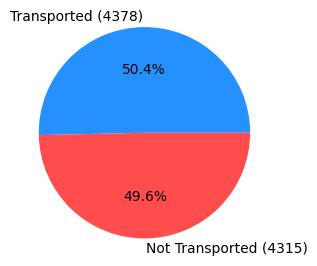

In [5]:
plt.figure(figsize=(3, 3))
counts = df_train['Transported'].value_counts()
labels = [f"Transported ({counts[True]})", f"Not Transported ({counts[False]})"]
plt.pie(counts, labels = labels, autopct = '%1.1f%%', colors = ['#2491ff', '#ff4c4c'])

plt.axis('equal')
plt.show()

### Expenses distribution

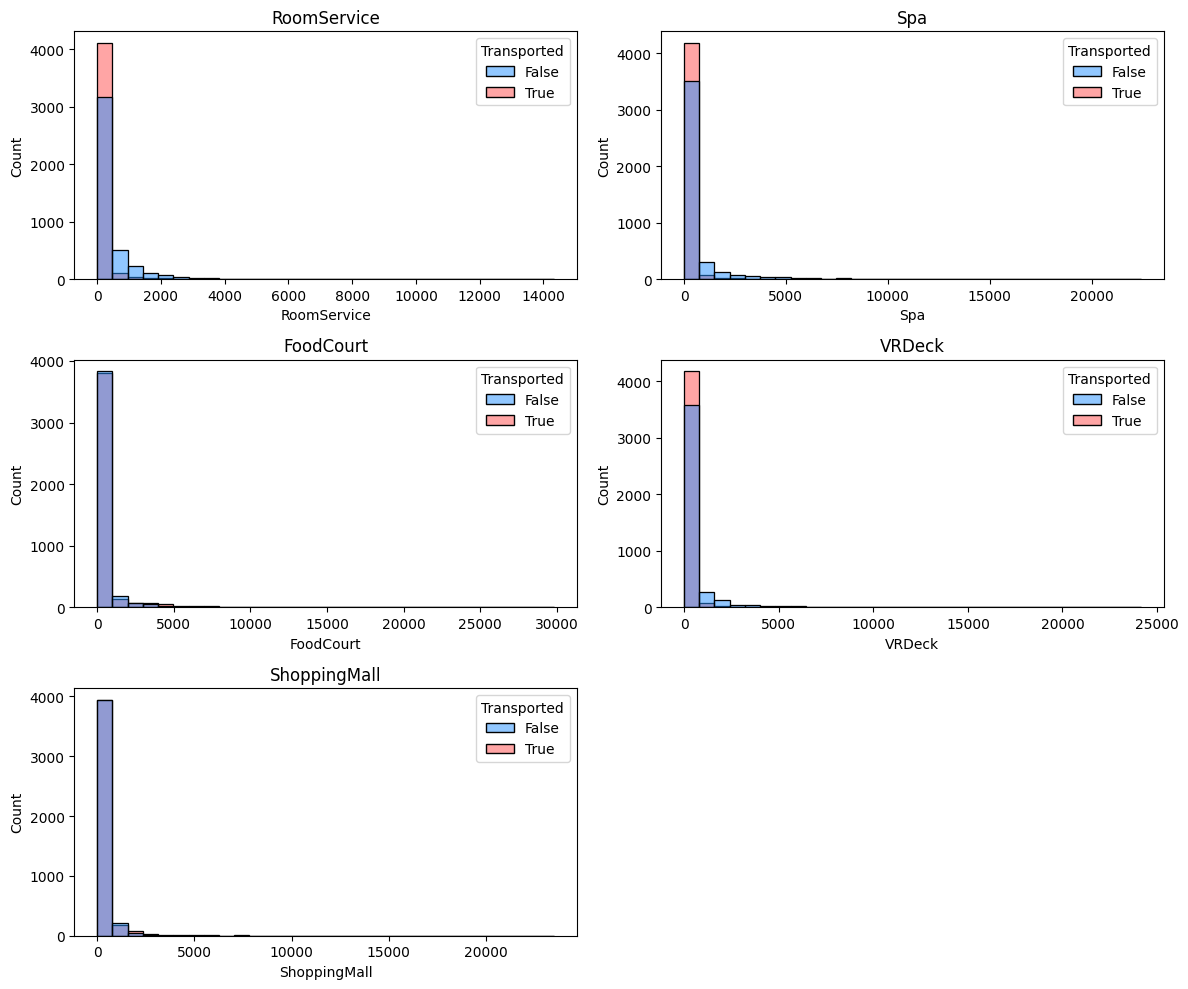

In [6]:
expenses_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
for i, feature in enumerate(expenses_features[:3]):
    ax = axes[i, 0]
    sns.histplot(data=df_train, x=feature, ax=ax, bins=30, kde=False, hue='Transported', palette=['#2491ff', '#ff4c4c'])
    ax.set_title(feature)

for j, feature in enumerate(expenses_features[3:]):
    ax = axes[j, 1]
    sns.histplot(data=df_train, x=feature, ax=ax, bins=30, kde=False, hue='Transported', palette=['#2491ff', '#ff4c4c'])
    ax.set_title(feature)

axes[2, 1].set_visible(False)

fig.tight_layout()
plt.show()


We notice that most passengers have no expenses. Then we will create a new feature indicating whether a passenger has expenses or not.

### CryoSleep distribution

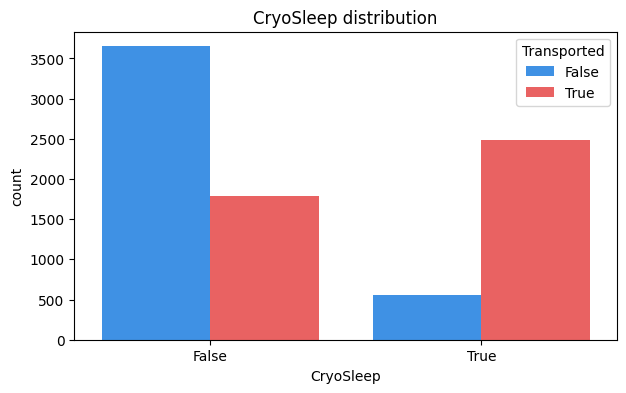

In [7]:
plt.figure(figsize = (7, 4))
sns.countplot(data = df_train, x = 'CryoSleep', hue = 'Transported', palette = ['#2491ff', '#ff4c4c'])
plt.title('CryoSleep distribution')
plt.show()


CryoSleep seems to have an impact on the target variable since most passengers in CryoSleep were transported.

### HomePlanet distribution

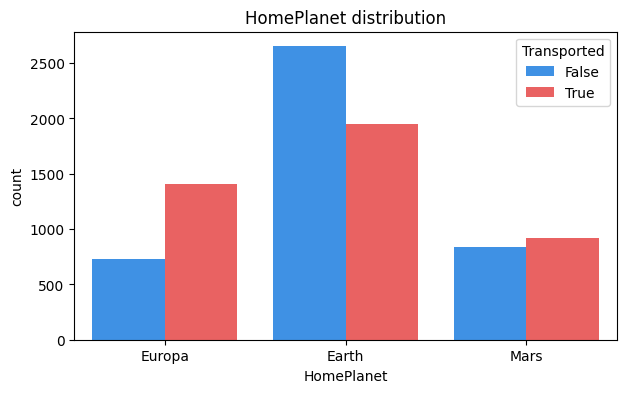

In [8]:
plt.figure(figsize = (7, 4))
sns.countplot(data = df_train, x = 'HomePlanet', hue = 'Transported', palette = ['#2491ff', '#ff4c4c'])
plt.title('HomePlanet distribution')
plt.show()

HomePlanet seems to have a little significant impact on the target variable. We will keep it for now as it might interact with other features later.

### Destination distribution

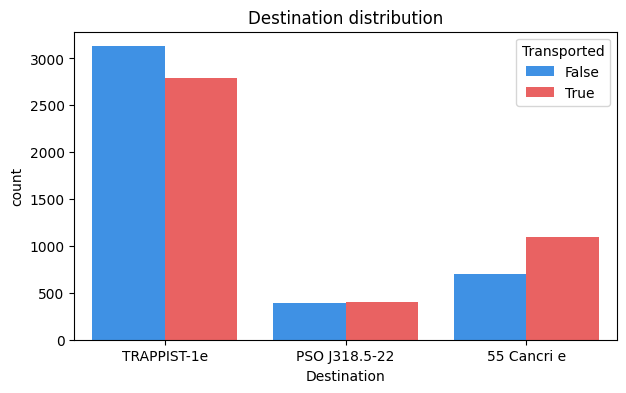

In [9]:
plt.figure(figsize = (7, 4))
sns.countplot(data = df_train, x = 'Destination', hue = 'Transported', palette = ['#2491ff', '#ff4c4c'])
plt.title('Destination distribution')
plt.show()

However, Destination does not seem to have a significant impact on the target variable, but we will keep it for now as it might interact with other features later.

### VIP distribution

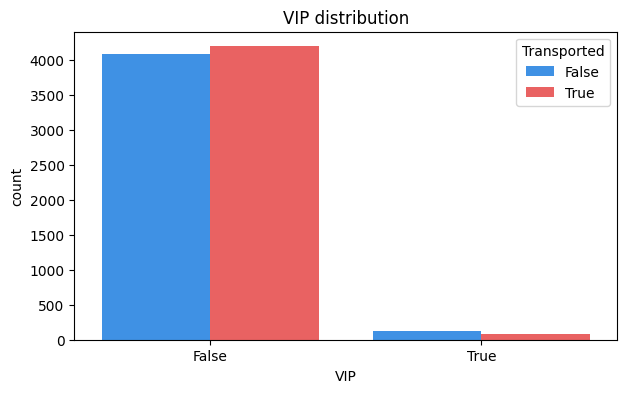

In [10]:
fig = plt.figure(figsize=(7, 4))
sns.countplot(data = df_train, x = 'VIP', hue = 'Transported', palette = ['#2491ff', '#ff4c4c'])
plt.title('VIP distribution')
plt.show()

VIP does not seem to have a significant impact on the target variable. We will drop it.

### Qualitative features

We can't plot all qualitative features yet because they have too many unique values. We will handle them later.

In [11]:
qualitative_features = ['PassengerId', 'Name', 'Cabin']

print(df_train[qualitative_features].head())

  PassengerId               Name  Cabin
0     0001_01    Maham Ofracculy  B/0/P
1     0002_01       Juanna Vines  F/0/S
2     0003_01      Altark Susent  A/0/S
3     0003_02       Solam Susent  A/0/S
4     0004_01  Willy Santantines  F/1/S


So in these features, we can extract some information:

- We can extract the group of a passenger from the PassengerId feature. We will create a new feature indicating the group of a passenger.

- We can extract the deck and side of a passenger from the Cabin feature. We will create two new features indicating the deck and side of a passenger.

- We can extract the last name of a passenger from the Name feature. We will create a new feature indicating the last name of a passenger.

## Clean data

### Display missing values

In [12]:
# Missing values summary for train set
print("Train missing values stats:")
null_train_cols = df_train.columns[df_train.isna().any()].tolist()
mv_train = pd.DataFrame(df_train[null_train_cols].isna().sum(), columns=['Number_missing'])
mv_train['Percentage_missing'] = np.round(100 * mv_train['Number_missing'] / len(df_train), 2)
print(mv_train)

print("\n" + "="*50 + "\n")

# Missing values summary for test set
print("Test missing values stats:")
null_test_cols = df_test.columns[df_test.isna().any()].tolist()
mv_test = pd.DataFrame(df_test[null_test_cols].isna().sum(), columns=['Number_missing'])
mv_test['Percentage_missing'] = np.round(100 * mv_test['Number_missing'] / len(df_test), 2)
print(mv_test)

Train missing values stats:
              Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Cabin                    199                2.29
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Name                     200                2.30


Test missing values stats:
              Number_missing  Percentage_missing
HomePlanet                87                2.03
CryoSleep                 93                2.17
Cabin                    100                2.34
Destination               92                2.15
Age                       91                2.13
VIP         

Approximately only 2% of values are missing in the two datasets. We will handle them later.

### Display missing values per passenger

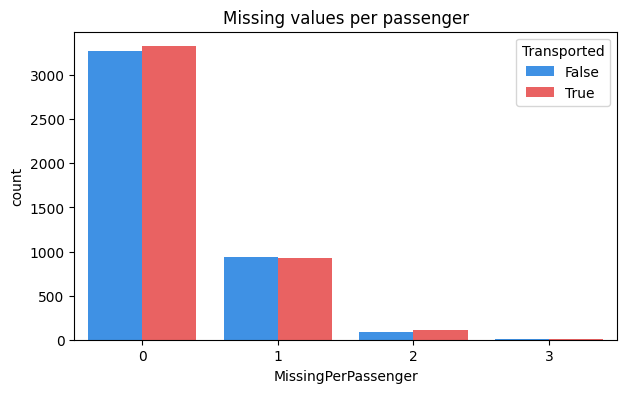

In [13]:
df_train['MissingPerPassenger'] = df_train.isna().sum(axis=1)
plt.figure(figsize = (7, 4))
sns.countplot(data = df_train, x = df_train['MissingPerPassenger'], hue = 'Transported', palette = ['#2491ff', '#ff4c4c'])
plt.title('Missing values per passenger')
df_train = df_train.drop(columns = ['MissingPerPassenger'], axis = 1)

We're only missing around 2% of the values, but around 25% of passengers have at least one missing value. The easiest way to handle them could be to use the median for numerical features and the mode for categorical features. However, we will look at the joint distribution of missing values to see if there are patterns.

### Features creation functions

#### Calculate spendings

In [14]:
# Calculate total spendings and add it as a new feature 'TotalSpending'
# Add a new feature 'NoSpending' which is True if the passenger has not spent money in any of the categories
def calculate_spendings(data: pd.DataFrame):
	data['TotalSpending'] = data[expenses_features].sum(axis=1)
	data['NoSpending'] = (data['TotalSpending'] == 0)
	return data

#### Passenger groups

In [15]:
def create_groups(data: pd.DataFrame):
	data['Group'] = data['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
	data['GroupSize'] = data.groupby('Group')['Group'].transform('count')
	data['Solo'] = (data['GroupSize'] == 1).astype(int)
	return data

#### Calculate family size

In [16]:
def calculate_family_size(data: pd.DataFrame):
	data['Name'] = data['Name'].fillna('Unknown Unknown')
	data['LastName'] = data['Name'].str.split().str[-1]
	data['FamilySize'] = data.groupby('LastName')['LastName'].transform('count')

	data.loc[data['LastName'] == 'Unknown', 'LastName'] = np.nan
	data.loc[data['FamilySize'] > 100, 'FamilySize'] = np.nan

	data = data.drop('Name', axis=1)

#### Split Cabin

In [17]:
def split_cabin(data: pd.DataFrame):
	data['Cabin'] = data['Cabin'].fillna('Z/9999/Z')

	data['CabinDeck'] = data['Cabin'].apply(lambda x: str(x).split('/')[0])
	data['CabinSide'] = data['Cabin'].apply(lambda x: str(x).split('/')[-1])

	data.loc[data['CabinDeck']=='Z', 'CabinDeck']=np.nan
	data.loc[data['CabinSide']=='Z', 'CabinSide']=np.nan

	data = data.drop(['Cabin'], axis=1)

#### Split Name

In [18]:
def split_name(data: pd.DataFrame):
  data['Name'] = data['Name'].fillna('Unknown Unknown')

  data['Surname'] = data['Name'].str.split().str[-1]
  data['FamilySize'] = data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

  data.loc[data['Surname'] == 'Unknown','Surname'] = np.nan
  data.loc[data['FamilySize'] > 100,'FamilySize'] = np.nan

  data = data.drop(['Name'], axis = 1)
  return data

### Complete missing values

#### Fill CryoSleep values

In [19]:
def fill_missing_cryo(data: pd.DataFrame):
  data.loc[(data['CryoSleep'].isna()) & (data['TotalSpending'] > 0), 'CryoSleep'] = False
  data.loc[(data['CryoSleep'].isna()) & (data['TotalSpending'] == 0), 'CryoSleep'] = True
  return data

#### Fill Spending values

In [20]:
def fill_missing_spending(data: pd.DataFrame):
  for feature in expenses_features:
    data.loc[(data[feature].isna()) & (data['CryoSleep'] == True), feature] = 0
    data.loc[(data[feature].isna()) & (data['CryoSleep'] == False), feature] = data[feature].median()
  return data

#### Fill HomePlanet values

In [21]:
def fill_missing_homeplanet(data: pd.DataFrame):
	df_grouped = data.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
	df_index = data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Group']).isin(df_grouped.index)].index
	data.loc[df_index, 'HomePlanet'] = data.iloc[df_index,:]['Group'].map(lambda x: df_grouped.idxmax(axis=1)[x])

	grouped_df = data.groupby(['CabinDeck', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
	data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet'] = 'Europa'
	data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck'].isin(['G'])), 'HomePlanet'] = 'Earth'

	grouped_df = data.groupby(['Surname', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
	df_index = data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(grouped_df.index)].index
	data.loc[df_index, 'HomePlanet'] = data.iloc[df_index,:]['Surname'].map(lambda x: grouped_df.idxmax(axis=1)[x])

	grouped_df = data.groupby(['HomePlanet', 'Destination'])['Destination'].size().unstack().fillna(0)
	data.loc[(data['HomePlanet'].isna()) & ~(data['CabinDeck']=='D'), 'HomePlanet']='Earth'
	data.loc[(data['HomePlanet'].isna()) & (data['CabinDeck']=='D'), 'HomePlanet']='Mars'
	return data

#### Fill Destination values

In [22]:
def fill_missing_destination(data: pd.DataFrame):
  data.loc[(data['Destination'].isna()), 'Destination'] = 'TRAPPIST-1e'
  return data

#### Fill CabinDeck values

In [23]:
def fill_missing_cabin_deck(data: pd.DataFrame):
	gb_df_deck = data[data['GroupSize']>1].groupby(['Group', 'CabinDeck'])['CabinDeck'].size().unstack().fillna(0)
	gcd_index=data[data['CabinDeck'].isna()][(data[data['CabinDeck'].isna()]['Group']).isin(gb_df_deck.index)].index
	data.loc[gcd_index,'CabinDeck'] = data.iloc[gcd_index,:]['Group'].map(lambda x: gb_df_deck.idxmax(axis=1)[x])

	data.groupby(['HomePlanet', 'Destination', 'Solo', 'CabinDeck'])['CabinDeck'].size().unstack().fillna(0)
	null_rows=data.loc[data['CabinDeck'].isna(),'CabinDeck'].index
	data.loc[data['CabinDeck'].isna(),'CabinDeck'] = data.groupby(['HomePlanet', 'Destination', 'Solo'])['CabinDeck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[null_rows]

	data.loc[data['CabinDeck'].isna(),'CabinDeck'] = 'Z'
	return data

#### Fill CabinSide values

In [24]:
def fill_missing_cabin_side(data: pd.DataFrame):
	gb_df_side = data[data['GroupSize']>1].groupby(['Group', 'CabinSide'])['CabinSide'].size().unstack().fillna(0)
	gcs_index=data[data['CabinSide'].isna()][(data[data['CabinSide'].isna()]['Group']).isin(gb_df_side.index)].index
	data.loc[gcs_index,'CabinSide'] = data.iloc[gcs_index,:]['Group'].map(lambda x: gb_df_side.idxmax(axis=1)[x])

	grouped_df_side = data[data['GroupSize']>1].groupby(['Surname', 'CabinSide'])['CabinSide'].size().unstack().fillna(0)
	scs_index=data[data['CabinSide'].isna()][(data[data['CabinSide'].isna()]['Surname']).isin(grouped_df_side.index)].index
	data.loc[scs_index,'CabinSide'] = data.iloc[scs_index,:]['Surname'].map(lambda x: grouped_df_side.idxmax(axis=1)[x])

	data.loc[data['CabinSide'].isna(),'CabinSide'] = 'Z'
	return data

#### Fill Age values

In [25]:
def fill_missing_age(data: pd.DataFrame):
  data.groupby(['HomePlanet', 'NoSpending', 'Solo', 'CabinDeck'])['Age'].median().unstack().fillna(0)
  null_rows = data.loc[data['Age'].isna(), 'Age'].index
  data.loc[data['Age'].isna(), 'Age'] = data.groupby(['HomePlanet', 'NoSpending', 'Solo', 'CabinDeck'])['Age'].transform(lambda x: x.fillna(x.median()))[null_rows]
  return data

#### Fill GroupSize values

In [26]:
def fill_group_size(data: pd.DataFrame):
  df_grouped = data[data['GroupSize'] > 1].groupby(['Group', 'Surname'])['Surname'].size().unstack(fill_value=0)
  df_index = data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(df_grouped.index)].index
  data.loc[df_index,'Surname']=data.iloc[df_index,:]['Group'].map(lambda x: df_grouped.idxmax(axis=1)[x])

  if not df_grouped.empty:
    most_freq = df_grouped.idxmax(axis=1).to_dict()
    mask = data['Surname'].isna() & data['Group'].isin(df_grouped.index)
    data.loc[mask, 'Surname'] = data.loc[mask, 'Group'].map(most_freq)

  data['Surname'] = data['Surname'].fillna('Unknown')
  data['FamilySize'] = data['Surname'].map(lambda x: data['Surname'].value_counts()[x])
  data.loc[data['Surname'] == 'Unknown', 'Surname'] = np.nan
  data.loc[data['FamilySize'] > 100, 'FamilySize'] = 0
  return data

#### Fill VIP values

In [27]:
def fill_missing_vip(data: pd.DataFrame):
  data.loc[data['VIP'].isna(),'VIP'] = False
  return data

### Create features & Clean data function

In [28]:
def clean(data: pd.DataFrame):
	calculate_spendings(data)
	create_groups(data)
	split_cabin(data)
	split_name(data)
	calculate_family_size(data)

	fill_missing_cryo(data)
	fill_missing_spending(data)
	fill_missing_homeplanet(data)
	fill_missing_destination(data)
	fill_missing_cabin_deck(data)
	fill_missing_cabin_side(data)
	fill_missing_age(data)
	fill_group_size(data)
	fill_missing_vip(data)

	data = data.drop(["Surname", "Group", "GroupSize", "PassengerId"], axis=1)
	return data

df_cleaned_train = clean(df_train)
df_cleaned_test = clean(df_test)

## Model training

In [29]:
y = df_cleaned_train['Transported'].astype('bool')
features = ["CryoSleep", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "TotalSpending", "HomePlanet", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Destination", "Age","CabinDeck", "FamilySize", "Solo", "CabinSide", "NoSpending", "VIP"]

X = pd.get_dummies(df_cleaned_train[features])
X_test = pd.get_dummies(df_cleaned_test[features])

model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Transported': predictions})
output.to_csv('submission.csv', index=False)